In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Credit_Card_Applications.csv")

In [3]:
df.shape

(690, 16)

In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
# Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc = MinMaxScaler(feature_range=(0,1))

In [8]:
X = sc.fit_transform(X)

In [9]:
# Training the SOM

In [10]:
from minisom import MiniSom

In [11]:
som = MiniSom(x=10,y=10, input_len=15,sigma=1.0,learning_rate=0.5)

In [12]:
som.random_weights_init(X)

In [13]:
som.train_random(X,100)

In [15]:
# visualizing

In [21]:
from pylab import bone,pcolor,colorbar,plot,show
%pylab inline

Populating the interactive namespace from numpy and matplotlib


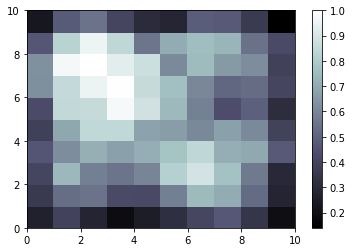

In [27]:
bone()
pcolor(som.distance_map().T)
colorbar()

In [28]:
# thw ehite ones are having high MID
# so they are frauds

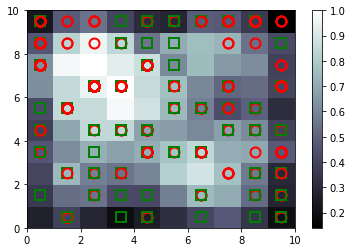

In [29]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i,x in enumerate(X):
    w = som.winner(x) # wiining node for customer x
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)

In [30]:
#finding the frauds

In [32]:
mappings =som.win_map(X)

In [47]:
# frauds = np.concatenate((mappings[(1,7)],
#                         mappings[(2,6)],
#                         mappings[(2,7)],
#                         mappings[(2,8)],
#                         mappings[(3,5)],
#                         mappings[(3,6)])
#                         ,axis=0)
frauds = np.concatenate((
                        mappings[(2,6)],
                        
                        mappings[(2,8)],
                        mappings[(3,6)])
                        ,axis=0)

In [48]:
frauds = sc.inverse_transform(frauds)

In [49]:
frauds

array([[  1.57395480e+07,   0.00000000e+00,   2.26700000e+01,
          7.00000000e+00,   2.00000000e+00,   8.00000000e+00,
          4.00000000e+00,   1.65000000e-01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.60000000e+02,   1.00000000e+00],
       [  1.56998390e+07,   0.00000000e+00,   2.81700000e+01,
          5.85000000e-01,   2.00000000e+00,   6.00000000e+00,
          4.00000000e+00,   4.00000000e-02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   2.60000000e+02,   1.00500000e+03],
       [  1.56480690e+07,   0.00000000e+00,   2.45000000e+01,
          1.75000000e+00,   1.00000000e+00,   8.00000000e+00,
          4.00000000e+00,   1.65000000e-01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.32000000e+02,   1.00000000e+00],
       [  1.57059180e+07,   0.00000000e+00,   3.73300000e+01,
     